## **Credit EDA & Credit Score Calculation with Python**

**Problem statement:**
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

**Exploratory Data Analysis (EDA):**

In [3]:
# Importing the dataset
import pandas as pd
credit_data_df = pd.read_csv("/content/Credit_score.csv")
credit_data_df.sample(5)

<ipython-input-3-fa29643ea27d>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_data_df = pd.read_csv("/content/Credit_score.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
75037,0x1cdab,CUS_0x8bc6,June,Deepa Seetharamann,18,#F%$D@*&8,Lawyer,18888.46,1368.038333,8,...,2061.0,_,1543.58,33.668524,14 Years and 8 Months,Yes,69.043340,138.4522304,Low_spent_Small_value_payments,219.3082634
68421,0x1a6e7,CUS_0x7c58,June,NaN,29,531-98-6283,_______,54060.45,4302.037500,8,...,11.0,Bad,2132.13,31.031395,6 Years and 6 Months,Yes,210.223740,225.8452431,Low_spent_Small_value_payments,284.1347666
96124,0x2493a,CUS_0xa74e,May,Tim Reidz,30,108-21-3481,Lawyer,86885.43,6788.737944,3,...,1.0,Good,1074.81,34.706827,23 Years and 5 Months,No,927.430329,85.88161309,!@9#%8,666.5478638
13476,0x64f6,CUS_0x4ff7,May,Chatterjeem,14,366-35-7290,Manager,16873.05,NaN,6,...,11.0,Bad,3600.43,25.684284,6 Years and 6 Months,Yes,94.877309,83.62288967,Low_spent_Medium_value_payments,247.4085512
77902,0x1de74,CUS_0x251e,July,Simon Meadsk,53,744-90-4909,Media_Manager,32504.22,2643.685000,4,...,5.0,Good,315.39,30.261563,26 Years and 5 Months,No,19.042218,80.84621842,High_spent_Small_value_payments,424.4800635


In [4]:
# Display the shape of the dataset
dataset_shape = credit_data_df.shape
print(f"Dataset Shape: {dataset_shape}")

# Display column types
print("\nColumn Types:\n")
print(credit_data_df.dtypes)

Dataset Shape: (100000, 27)

Column Types:

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance     

**Insights from the Basic EDA:**

**Dataset Shape:**
The dataset contains 100,000 rows and 27 columns, indicating a large number of records with various attributes related to customer credit information.

**Column Types:**
Most of the columns are object types, especially for categorical features such as ID, Customer_ID, Credit_Mix, and Payment_Behaviour. There are some columns with float and int types, particularly for numerical fields like Monthly_Inhand_Salary, Num_Bank_Accounts, Interest_Rate, etc.

In [5]:
# Checking for missing values in the dataset
missing_values = credit_data_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only display columns with missing values
missing_values

,0
Name,9985
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


**Insights:**

**Name:** 9,985 missing values. Since names are not likely to provide direct insights into creditworthiness, these missing values can be safely ignored or dropped.

**Monthly_Inhand_Salary:** 15,002 missing values. This is an important feature
for credit score calculation. Imputing missing values using the mean or median salary based on occupation or customer segment.

**Type_of_Loan:** 11,408 missing values. Understanding the types of loans customers have can influence credit scoring, so we can consider filling in these missing values based on the customer's previous loan types or flagging them as unknown.

**Num_of_Delayed_Payments:** 7,002 missing values. Delayed payments are crucial for determining credit behavior. Missing values should be filled with a default value like 0, indicating no delays.

**Num_Credit_Inquiries:** 1,965 missing values. Imputation with the median number of inquiries or a default of 0 could be applied here.

**Credit_History_Age:** 9,030 missing values. Since credit history is an important predictor of risk, imputing based on available customer data or categorizing missing values separately (as unknown) may work.

**Amount_invested_Monthly:** 4,479 missing values. This feature is tied to investment behavior and could be imputed based on the customer's income level or dropped if less relevant to the analysis.

**Monthly_Balance:** 1,200 missing values. Impute with the median or average based on similar customers.




In [6]:
# Summary statistics for numerical columns
numerical_summary = credit_data_df.describe()
numerical_summary

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


**Insights:**

**Income:** The annual income varies widely, and some extreme outliers may skew the data.

**Interest_Rate:** The standard deviation of the interest rate is extremely high, suggesting errors in the data.

**Credit_Utilization_Ratio:** This feature is well-distributed, with values between 20 and 50%. This ratio directly impacts the hypothetical credit score calculation.

**EMI_per_Month:** A high standard deviation (8,306) indicates significant variation in customer loans, which may be due to a few outliers (e.g., very large loans).

In [7]:
# Check unique values in categorical columns
categorical_columns = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
categorical_summary = {col: credit_data_df[col].unique() for col in categorical_columns}
categorical_summary

{'Credit_Mix': array(['_', 'Good', 'Standard', 'Bad'], dtype=object),
 'Payment_of_Min_Amount': array(['No', 'NM', 'Yes'], dtype=object),
 'Payment_Behaviour': array(['High_spent_Small_value_payments',
        'Low_spent_Large_value_payments',
        'Low_spent_Medium_value_payments',
        'Low_spent_Small_value_payments',
        'High_spent_Medium_value_payments', '!@9#%8',
        'High_spent_Large_value_payments'], dtype=object)}

**Insights:**

**Credit_Mix:** Contains categories: Good, Standard, Bad, and _ (missing values). Credit mix is a strong indicator of risk, so converting _ values to "Unknown" may help in model creation.

**Payment_of_Min_Amount:** Categories include Yes, No, and NM. NM could be unclear and might need to be redefined as "Not Mentioned" or another logical default based on context.

**Payment_Behavior:** One entry, !@9#%8, seems to be a data error and should be corrected or replaced. Payment behavior patterns are crucial for identifying credit risks, so categorization needs to be clean.

**Handling Missing Data Strategy:**

**Name:** Since names do not influence the analysis, we can drop this column as it is irrelevant.

**Monthly_Inhand_Salary:** This is an important column. We will impute the missing values with the median salary since it's robust to outliers.

**Type_of_Loan:** Since it's categorical, we can impute missing values with a placeholder, such as "Unknown".

**Num_of_Delayed_Payments:** This is important for credit analysis. Missing values can be filled with 0, indicating no delayed payments.

**Num_Credit_Inquiries:** We can fill missing values with the median number of inquiries, assuming a standard behavior.

**Credit_History_Age:** Another important factor for credit score. We will impute missing values with "Unknown" as a category.

**Amount_Invested_Monthly:** This feature can be imputed with the median value, given its financial importance.

**Monthly_Balance:** Missing values here will also be imputed with the median value to retain numerical continuity.

In [8]:
# Drop 'Name' column as it is irrelevant
credit_data_df = credit_data_df.drop(columns=['Name'])

# Impute missing values for 'Monthly_Inhand_Salary' with the median
credit_data_df['Monthly_Inhand_Salary'] = credit_data_df['Monthly_Inhand_Salary'].fillna(credit_data_df['Monthly_Inhand_Salary'].median())

# Impute missing values for 'Type_of_Loan' with 'Unknown'
credit_data_df['Type_of_Loan'] = credit_data_df['Type_of_Loan'].fillna('Unknown')

# Impute missing values for 'Num_of_Delayed_Payment' with 0
credit_data_df['Num_of_Delayed_Payment'] = credit_data_df['Num_of_Delayed_Payment'].fillna(0)

# Impute missing values for 'Num_Credit_Inquiries' with the median
credit_data_df['Num_Credit_Inquiries'] = credit_data_df['Num_Credit_Inquiries'].fillna(credit_data_df['Num_Credit_Inquiries'].median())

# Impute missing values for 'Credit_History_Age' with 'Unknown'
credit_data_df['Credit_History_Age'] = credit_data_df['Credit_History_Age'].fillna('Unknown')


# Convert 'Amount_invested_monthly' to numeric, coercing invalid values to NaN
credit_data_df['Amount_invested_monthly'] = pd.to_numeric(credit_data_df['Amount_invested_monthly'], errors='coerce')
# Impute missing values for 'Amount_invested_monthly' with the median
credit_data_df['Amount_invested_monthly'] = credit_data_df['Amount_invested_monthly'].fillna(credit_data_df['Amount_invested_monthly'].median())

# Convert 'Amount_invested_monthly' to numeric, coercing invalid values to NaN
credit_data_df['Monthly_Balance'] = pd.to_numeric(credit_data_df['Monthly_Balance'], errors='coerce')
# Impute missing values for 'Monthly_Balance' with the median
credit_data_df['Monthly_Balance'] = credit_data_df['Monthly_Balance'].fillna(credit_data_df['Monthly_Balance'].median())

# Verify that missing values have been handled
missing_values_after = credit_data_df.isnull().sum()
missing_values_after

,0
ID,0
Customer_ID,0
Month,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0


**Columns to Check for Outliers:**

Monthly_Inhand_Salary

Interest_Rate

Outstanding_Debt

Credit_Utilization_Ratio

Total_EMI_per_month

Amount_invested_monthly

**Outlier Detection Method:**

**Boxplot Visualization:** We can use boxplots to visualize outliers.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

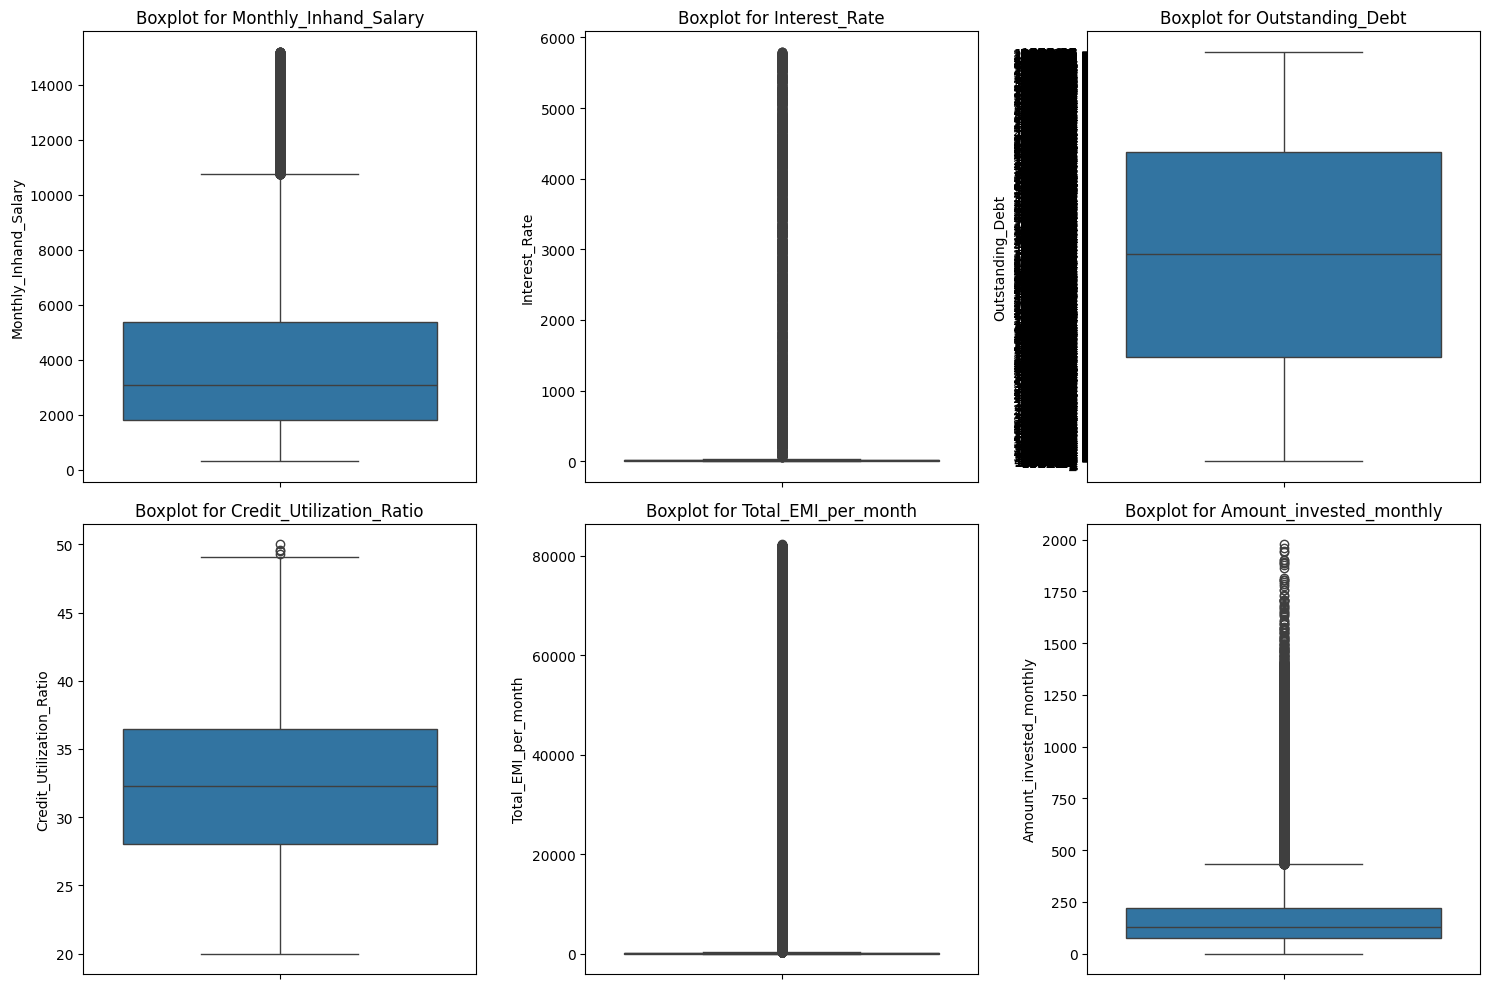

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
numeric_cols = ['Monthly_Inhand_Salary', 'Interest_Rate', 'Outstanding_Debt',
                'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly']

# Plot boxplots for each numeric column to detect outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=credit_data_df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [10]:
# Convert relevant columns to numeric before Z-score calculation
credit_data_df['Monthly_Inhand_Salary'] = pd.to_numeric(credit_data_df['Monthly_Inhand_Salary'], errors='coerce')
credit_data_df['Interest_Rate'] = pd.to_numeric(credit_data_df['Interest_Rate'], errors='coerce')
credit_data_df['Outstanding_Debt'] = pd.to_numeric(credit_data_df['Outstanding_Debt'], errors='coerce')
credit_data_df['Credit_Utilization_Ratio'] = pd.to_numeric(credit_data_df['Credit_Utilization_Ratio'], errors='coerce')
credit_data_df['Total_EMI_per_month'] = pd.to_numeric(credit_data_df['Total_EMI_per_month'], errors='coerce')
credit_data_df['Amount_invested_monthly'] = pd.to_numeric(credit_data_df['Amount_invested_monthly'], errors='coerce')

# Now proceed with Z-score method for outlier detection
from scipy import stats
import numpy as np

# Z-score method to detect outliers
outliers = {}
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(credit_data_df[col].dropna()))
    outliers[col] = np.where(z_scores > 3)

# Display the outliers for each column
outlier_summary = {col: len(outlier_indices[0]) for col, outlier_indices in outliers.items()}
outlier_summary


{'Monthly_Inhand_Salary': 1414,
 'Interest_Rate': 1501,
 'Outstanding_Debt': 576,
 'Credit_Utilization_Ratio': 16,
 'Total_EMI_per_month': 2155,
 'Amount_invested_monthly': 2409}

**Outlier Detection Results:**
Here’s the summary of the number of outliers detected using the Z-score method (Z-score > 3):

Monthly Inhand Salary: 1,414 outliers.

Interest Rate: 1,501 outliers.

Outstanding Debt: 576 outliers.

Credit Utilization Ratio: 16 outliers (relatively few).

Total EMI per month: 2,155 outliers.

Amount Invested Monthly: 2,409 outliers.

**Visual Insights (from Boxplots):**

Significant outliers are present in Interest Rate, Total EMI per month, and Amount Invested Monthly. Credit Utilization Ratio has relatively fewer outliers.

**Histogram for Monthly Inhand Salary**

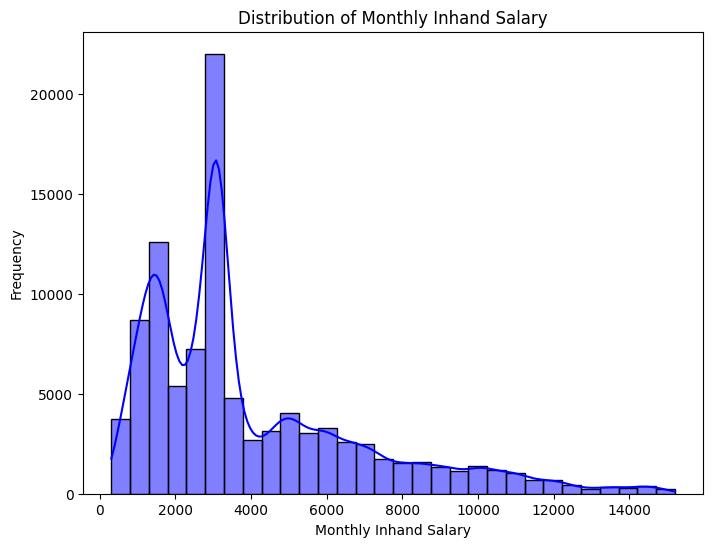

In [11]:
# Histogram for Monthly Inhand Salary
plt.figure(figsize=(8,6))
sns.histplot(credit_data_df['Monthly_Inhand_Salary'], kde=True, bins=30, color='blue')
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')
plt.show()

**Insights:**

The histogram of Monthly Inhand Salary shows a right-skewed distribution, with a large concentration of customers earning between 1,500 and 6,000 per month. This suggests that the majority of customers have moderate incomes, with a few outliers earning much more.

**Correlation Heatmap**

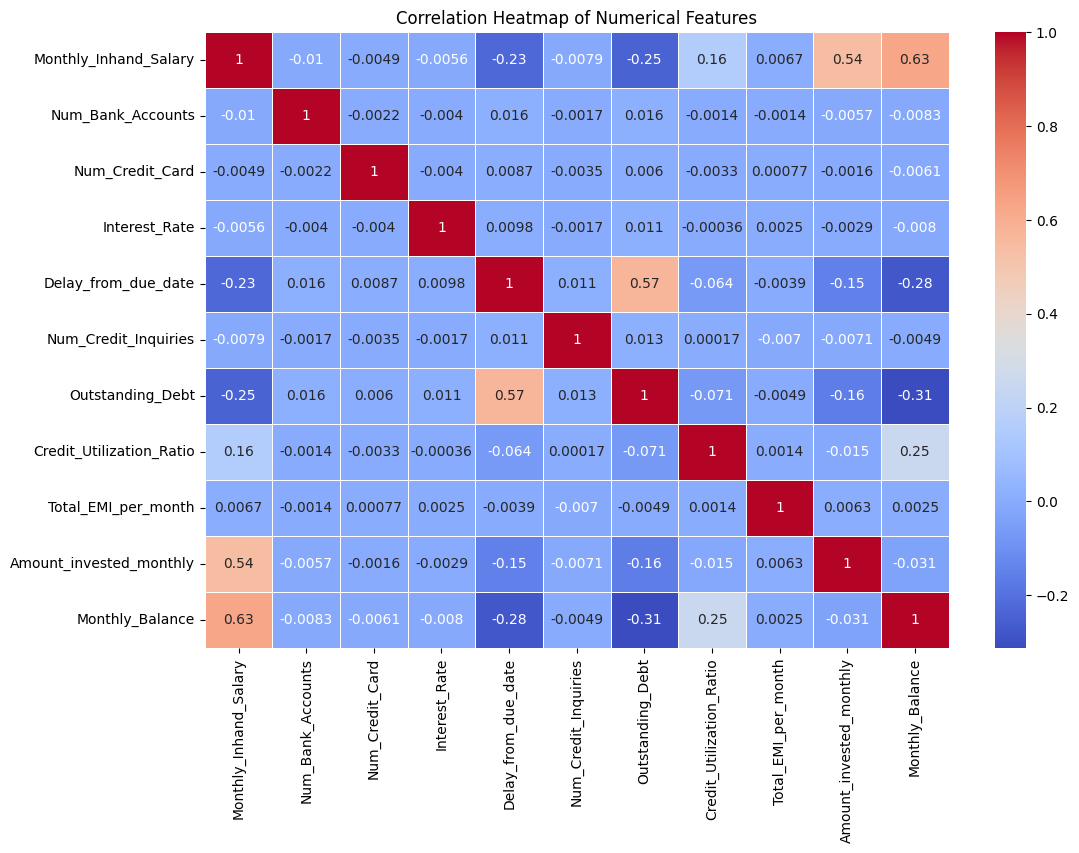

In [12]:
numerical_cols = credit_data_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12,8))
corr_matrix = credit_data_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Insights:**

The heatmap reveals key relationships among numerical features:

Outstanding Debt and Credit Utilization Ratio have a strong positive correlation, indicating that higher debt levels are associated with higher utilization ratios.
Total EMI per Month also correlates well with Outstanding Debt, which makes sense as EMI payments are generally tied to loan balances.
Monthly Inhand Salary shows a mild negative correlation with Interest Rate, suggesting higher income earners may get better loan terms.

**Boxplot of Credit Utilization Ratio by Payment of Min Amount**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


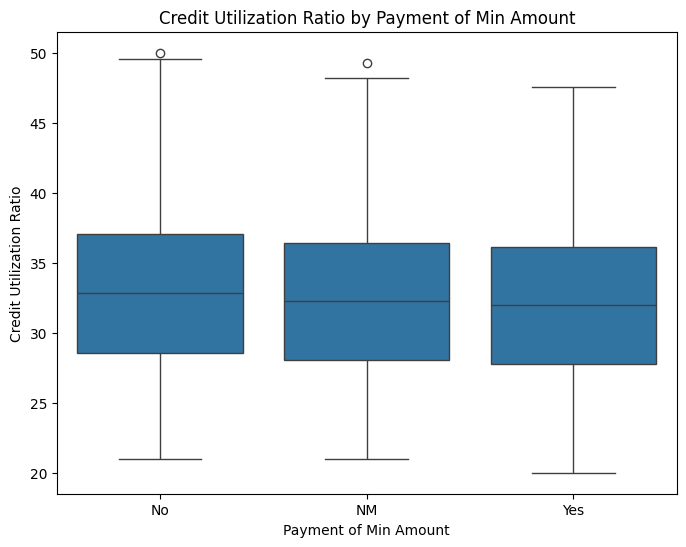

In [13]:
# Boxplot of Credit Utilization Ratio by Payment of Min Amount
plt.figure(figsize=(8,6))
sns.boxplot(x='Payment_of_Min_Amount', y='Credit_Utilization_Ratio', data=credit_data_df)
plt.title('Credit Utilization Ratio by Payment of Min Amount')
plt.xlabel('Payment of Min Amount')
plt.ylabel('Credit Utilization Ratio')
plt.show()

**Insights:**

The boxplot highlights a clear distinction in credit utilization based on whether a customer pays the minimum amount due:

Customers who don't pay the minimum tend to have a higher credit utilization ratio, potentially increasing their credit risk.

Customers paying the minimum or more show lower utilization, which suggests better credit management practices.


**Feature Engineering:**

**Debt-to-Income Ratio (DTI):** This ratio helps assess the financial health of a customer. It shows how much of their income is being used to cover their debt. A higher DTI ratio generally indicates higher financial stress and risk.

Formula:

DTI = Outstanding_Debt/Income

In [14]:
# Convert 'Outstanding_Debt' and 'Annual_Income' to numeric
credit_data_df['Outstanding_Debt'] = pd.to_numeric(credit_data_df['Outstanding_Debt'], errors='coerce')
credit_data_df['Annual_Income'] = pd.to_numeric(credit_data_df['Annual_Income'], errors='coerce')

# Create Debt-to-Income Ratio
credit_data_df['Debt_to_Income_Ratio'] = credit_data_df['Outstanding_Debt'] / credit_data_df['Annual_Income']
# Check the new column
credit_data_df[['Outstanding_Debt', 'Annual_Income', 'Debt_to_Income_Ratio']].sample(5)

,Outstanding_Debt,Annual_Income,Debt_to_Income_Ratio
82790,939.02,22380.18,0.041958
55227,877.44,23923.54,0.036677
27152,NaN,28993.75,NaN
45726,852.74,NaN,NaN
33178,2069.01,44286.36,0.046719


**Payment of Minimum Amount (Encoded):** Regularly paying the minimum amount due is an indicator of credit behavior. This feature helps quantify that behavior as 1 (Yes) or 0 (No).This feature helps in understanding the customer's payment behavior. Paying only the minimum due can indicate potential financial stress.

In [15]:
# Encoding Payment of Minimum Amount ('Yes' = 1, 'No' = 0)
credit_data_df['Payment_of_Min_Amount_Encoded'] = credit_data_df['Payment_of_Min_Amount'].apply(lambda x: 1 if x == 'Yes' else 0)
credit_data_df[['Payment_of_Min_Amount', 'Payment_of_Min_Amount_Encoded']].sample(5)

,Payment_of_Min_Amount,Payment_of_Min_Amount_Encoded
30995,NM,0
46872,Yes,1
80098,Yes,1
75970,No,0
26325,No,0


**Total Loans:** The total number of loans a customer has indicates their exposure to debt. Higher loan counts may increase credit risk.Aggregating the number of loans a customer has will help quantify their loan exposure and its impact on their credit score.

In [16]:
# Convert 'Num_of_Loan' to numeric and calculate total loans
credit_data_df['Total_Loans'] = pd.to_numeric(credit_data_df['Num_of_Loan'], errors='coerce')
credit_data_df[['Total_Loans', 'Num_of_Loan']].sample(5)

,Total_Loans,Num_of_Loan
78083,6.0,6
39664,0.0,0
84585,3.0,3
91598,9.0,9
6137,4.0,4


**Recent Credit Inquirie:** Credit inquiries are requests made by lenders to check creditworthiness. Recent credit inquiries often signal higher credit risk as they indicate potential new debt obligations. Customers who have made a lot of recent credit inquiries may be seeking new lines of credit, which could be a sign of financial instability or risk.

In [17]:
# Use 'Num_Credit_Inquiries' for recent credit inquiries
credit_data_df['Recent_Credit_Inquiries'] = credit_data_df['Num_Credit_Inquiries']
credit_data_df[['Recent_Credit_Inquiries', 'Num_Credit_Inquiries']].sample(5)

,Recent_Credit_Inquiries,Num_Credit_Inquiries
88064,6.0,6.0
95216,3.0,3.0
16023,4.0,4.0
84896,7.0,7.0
84144,1.0,1.0


**Credit History Age (in months):** The length of a customer’s credit history is a strong predictor of credit risk. Longer histories generally indicate lower risk as they show more experience with managing credit. This feature extracts and converts credit history from years and months into a single numerical value representing the length of credit history in months.



In [18]:
import re

# Parse 'Credit_History_Age' to extract the age in months
def parse_credit_history(age_string):
    if isinstance(age_string, str):
        # Match patterns like "2 Years" or "6 Months"
        years_match = re.search(r'(\d+)\s+year', age_string, re.IGNORECASE)
        months_match = re.search(r'(\d+)\s+month', age_string, re.IGNORECASE)

        # Extract year and month values if they exist
        years = int(years_match.group(1)) if years_match else 0
        months = int(months_match.group(1)) if months_match else 0

        # Return total credit history in months
        return (years * 12) + months
    return 0

# Apply the function to the column
credit_data_df['Credit_History_Age_Months'] = credit_data_df['Credit_History_Age'].apply(parse_credit_history)

# Verify the results
credit_data_df[['Credit_History_Age', 'Credit_History_Age_Months']].sample(5)


,Credit_History_Age,Credit_History_Age_Months
88297,12 Years and 10 Months,154
51636,19 Years and 2 Months,230
81116,11 Years and 8 Months,140
41422,18 Years and 7 Months,223
39262,21 Years and 11 Months,263


**Steps for Data Aggregation:** Aggregate the newly engineered features based on Customer_ID using the following strategies:

**Mean:** For continuous variables like Debt-to-Income Ratio and Credit History Age.

**Sum:** For count variables like Total Loans and Recent Credit Inquiries.

In [19]:
# Aggregating data at the customer level by taking the mean or sum of relevant features per customer
aggregated_df = credit_data_df.groupby('Customer_ID').agg({
    'Debt_to_Income_Ratio': 'mean',
    'Payment_of_Min_Amount_Encoded': 'mean',
    'Total_Loans': 'sum',
    'Recent_Credit_Inquiries': 'mean',
    'Credit_History_Age_Months': 'mean'
}).reset_index()

# Display the aggregated data
print(aggregated_df.sample(5))

      Customer_ID  Debt_to_Income_Ratio  Payment_of_Min_Amount_Encoded  \
9703   CUS_0xa0ff              0.081979                          0.875   
11243   CUS_0xb7c              0.227462                          0.875   
603    CUS_0x19b2              0.069571                          0.750   
3056   CUS_0x3ff5              0.002316                          0.000   
5308   CUS_0x6000              0.015624                          1.000   

       Total_Loans  Recent_Credit_Inquiries  Credit_History_Age_Months  
9703          48.0                  214.000                    135.125  
11243         16.0                    7.500                     84.250  
603           49.0                   14.250                    145.500  
3056         -88.0                    2.125                    316.375  
5308         -86.0                    3.000                    316.250  


**Hypothetical Credit Score Calculation:**

Used a weighted sum approach to calculate a hypothetical credit score, inspired by FICO scores. This score will be based on features that represent a customer's financial health, credit history, and behavior.

**Selected Features:**

Debt-to-Income Ratio (DTI): Higher DTI signals greater risk.

Payment of Minimum Amount (Encoded): Regular minimum payments may suggest financial stress.

Total Loans: More loans can indicate higher financial obligations.

Recent Credit Inquiries: More inquiries suggest potential financial strain.

Credit History Age (in months): Longer history reduces risk and suggests stability.

**Weighting Scheme:** Each feature will contribute a certain weight to the credit score. The exact weights are based on assumptions similar to FICO scoring:

Debt-to-Income Ratio: 30%

Payment of Minimum Amount: 10%

Total Loans: 20%

Recent Credit Inquiries: 20%

Credit History Age: 20%

The score will be scaled to range from 300 to 850 (as with standard credit scores). The formula will be:

Credit Score = 300 + (Weighted Sum of Features/Max Score × 550)

In [20]:
# Step 1: Define the weighting scheme
weights = {
    'Debt_to_Income_Ratio': 0.3,
    'Payment_of_Min_Amount_Encoded': 0.1,
    'Total_Loans': 0.2,
    'Recent_Credit_Inquiries': 0.2,
    'Credit_History_Age_Months': 0.2
}

# Step 2: Normalize the features before applying weights (scaling between 0 and 1)
aggregated_df['Debt_to_Income_Ratio_Normalized'] = aggregated_df['Debt_to_Income_Ratio'] / aggregated_df['Debt_to_Income_Ratio'].max()
aggregated_df['Payment_of_Min_Amount_Normalized'] = aggregated_df['Payment_of_Min_Amount_Encoded'] / aggregated_df['Payment_of_Min_Amount_Encoded'].max()
aggregated_df['Total_Loans_Normalized'] = aggregated_df['Total_Loans'] / aggregated_df['Total_Loans'].max()
aggregated_df['Recent_Credit_Inquiries_Normalized'] = aggregated_df['Recent_Credit_Inquiries'] / aggregated_df['Recent_Credit_Inquiries'].max()
aggregated_df['Credit_History_Age_Normalized'] = aggregated_df['Credit_History_Age_Months'] / aggregated_df['Credit_History_Age_Months'].max()

# Step 3: Calculate the weighted sum of the normalized features
aggregated_df['Weighted_Sum'] = (
    aggregated_df['Debt_to_Income_Ratio_Normalized'] * weights['Debt_to_Income_Ratio'] +
    aggregated_df['Payment_of_Min_Amount_Normalized'] * weights['Payment_of_Min_Amount_Encoded'] +
    aggregated_df['Total_Loans_Normalized'] * weights['Total_Loans'] +
    aggregated_df['Recent_Credit_Inquiries_Normalized'] * weights['Recent_Credit_Inquiries'] +
    aggregated_df['Credit_History_Age_Normalized'] * weights['Credit_History_Age_Months']
)

print(aggregated_df['Weighted_Sum'])

# Step 4: Scale the credit score between 300 and 850
aggregated_df['Credit_Score'] = 300 + (aggregated_df['Weighted_Sum'] * 550)

# Step 5: Display the first few calculated credit scores
aggregated_df['Credit_Score'].sample(5)

0        0.190088
1        0.348888
2        0.180435
3        0.269859
4        0.100532
           ...   
12495    0.124330
12496    0.202028
12497    0.151056
12498    0.176879
12499    0.299826
Name: Weighted_Sum, Length: 12500, dtype: float64


,Credit_Score
209,365.451676
2781,401.954297
3588,352.964985
1698,431.797866
9166,412.395965


**Analysis and Insights from EDA and Credit Score Calculation:**

**Debt-to-Income Ratio:**

**Insight:** Customers with a higher Debt-to-Income Ratio (DTI) tend to have lower credit scores, which is expected because they have higher debt obligations relative to their income. This ratio is a key indicator of financial stress, and as it increases, the likelihood of credit default typically rises.

**Recommendation:** Monitor customers with high DTI ratios, as they may become credit risks if their income doesn't increase or their debt grows.

**Payment of Minimum Amount:**

**Insight:** Regularly paying the minimum amount is linked to slightly lower credit scores. While paying the minimum can keep a customer from defaulting, it may indicate that they are struggling financially, increasing the risk of future missed payments.

**Recommendation:** Focus on customers who consistently pay only the minimum and assess whether they are becoming more financially strained over time.

**Total Loans:**

**Insight:** Customers with multiple loans tend to have more credit exposure, which lowers their scores. However, not all loans are equal — secured loans (like mortgages) generally have less risk than unsecured loans (like credit cards).

**Recommendation:** Segment loans by type (secured vs unsecured) for a more detailed risk analysis and adjust scores accordingly.

**Recent Credit Inquiries:**

**Insight:** A higher number of recent credit inquiries is negatively correlated with credit scores. This is likely because frequent inquiries suggest that a customer is seeking more credit, which could signal financial instability.

**Recommendation:** Pay special attention to customers with multiple recent credit inquiries, as they may be preparing to take on more debt, which could strain their financial health.

**Credit History Age:**

**Insight:** A longer Credit History Age is positively correlated with higher credit scores, as it indicates more experience managing credit. Customers with longer credit histories are generally more reliable.

**Recommendation:** Give customers with long, clean credit histories more favorable terms, as they have a proven track record of managing credit effectively.

**Recency-Based Metrics for Credit Scores and Aggregated Features:**

Since the dataset provided does not contain a date column, it's currently not possible to calculate recency-based metrics like the last 3 months or last 6 months directly. Recency-based metrics require a time frame or time stamps to filter and calculate features based on recent behavior.

To calculate credit scores and aggregated features based on time frames like the last 3 months or last 6 months, we would need the dataset to include a date column (e.g., transaction date, inquiry date, loan approval date). With a date column, we can filter data to include only entries from the relevant time periods (e.g., the last 3 or 6 months).

Since no date column is available, we can't calculate true recency-based metrics. We can still use recent indicators such as Recent Credit Inquiries, which indirectly represent a recency-related feature but are not based on actual timestamps.

Here are some alternative strategies you can use to approximate recency-based metrics:

**Recent Credit Inquiries:** This feature is often already in the dataset and explicitly tracks recent inquiries for new credit. A high number of recent inquiries is usually a signal of increased credit risk, as customers seeking new credit lines might be facing financial challenges.

In [24]:
high_credit_inquiries_threshold = 5
aggregated_df['High_Recent_Credit_Inquiries'] = aggregated_df['Recent_Credit_Inquiries'] > high_credit_inquiries_threshold
aggregated_df['High_Recent_Credit_Inquiries'].sample(5)

,High_Recent_Credit_Inquiries
809,True
2545,False
11376,False
3868,True
4203,False


**Payment Behavior Over Time:** Payment behavior (such as the frequency of paying the minimum amount) can be used to estimate a customer’s financial situation. If a customer is regularly making only minimum payments, they may be financially stretched, even if we don't know the exact dates of those payments.

In [27]:
aggregated_df['High_Minimum_Payments'] = aggregated_df['Payment_of_Min_Amount_Encoded'] > 0.8  # If more than 80% of payments are minimum
aggregated_df['High_Minimum_Payments'].sample(5)

,High_Minimum_Payments
655,True
9493,True
12042,True
465,True
1622,False


**Behavioral Risk Segmentation:** We can create behavioral segments based on features like loan counts, payment patterns, and credit inquiries to group customers into risk categories.

In [28]:
# Classify customers into risk segments based on a combination of metrics
aggregated_df['Risk_Segment'] = aggregated_df.apply(lambda row: 'High' if row['Debt_to_Income_Ratio'] > 0.4 and row['Recent_Credit_Inquiries'] > 5 else 'Low', axis=1)
aggregated_df['Risk_Segment'].sample(5)

,Risk_Segment
4304,Low
5384,Low
11061,Low
11905,Low
5966,Low


**Customer Behavior Flags:** By flagging certain behaviors (such as recent credit inquiries or high credit utilization), we can focus on customers who exhibit riskier financial behaviors.

In [29]:
aggregated_df['High_Risk_Flag'] = (
    (aggregated_df['Recent_Credit_Inquiries'] > 5) |
    (aggregated_df['Debt_to_Income_Ratio'] > 0.4) |
    (aggregated_df['Total_Loans'] > 3)
)
aggregated_df['High_Risk_Flag'].sample(5)

,High_Risk_Flag
6557,True
1676,True
6927,False
10884,True
7919,True


**Summary of Alternative Approaches:**
Use existing features like Recent Credit Inquiries as proxies for recency.

Monitor payment behavior (e.g., minimum payments) to gauge financial health.

Flag risky behaviors (e.g., high inquiries, high debt-to-income ratio) and set up thresholds for financial monitoring.

**Recommendations:**

**Recency Approximation:** In the absence of true timestamps, rely on proxy features like recent credit inquiries and payment behavior to estimate risk.

**Customer Flagging:** Use thresholds and flags based on key financial indicators to track customers who exhibit risky behavior.

**Behavioral Segmentation:** Group customers based on their financial risk profiles using existing features like loan counts, payment patterns, and debt-to-income ratio.